<a href="https://colab.research.google.com/github/Varsha-KML/ML-Logistic-Regression/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Mlprjt/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4238, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [ ]:
# Data Preprocessing
#Calculate missing values
df.drop(columns = 'education', inplace = True)
df.head(4)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1


In [ ]:
df.isna().sum().sort_values(ascending = False)

,0
glucose,388
BPMeds,53
totChol,50
cigsPerDay,29
BMI,19
heartRate,1
male,0
prevalentHyp,0
prevalentStroke,0
age,0


In [ ]:
#filled missing values in columns with relevant values
df['glucose'].fillna(df['glucose'].mean(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0], inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)

/tmp/ipython-input-11-1706994001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['glucose'].fillna(df['glucose'].mean(), inplace=True)
/tmp/ipython-input-11-1706994001.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'currentSmoker'}>,
        <Axes: title={'center': 'cigsPerDay'}>],
       [<Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>, <Axes: >]], dtype=object)

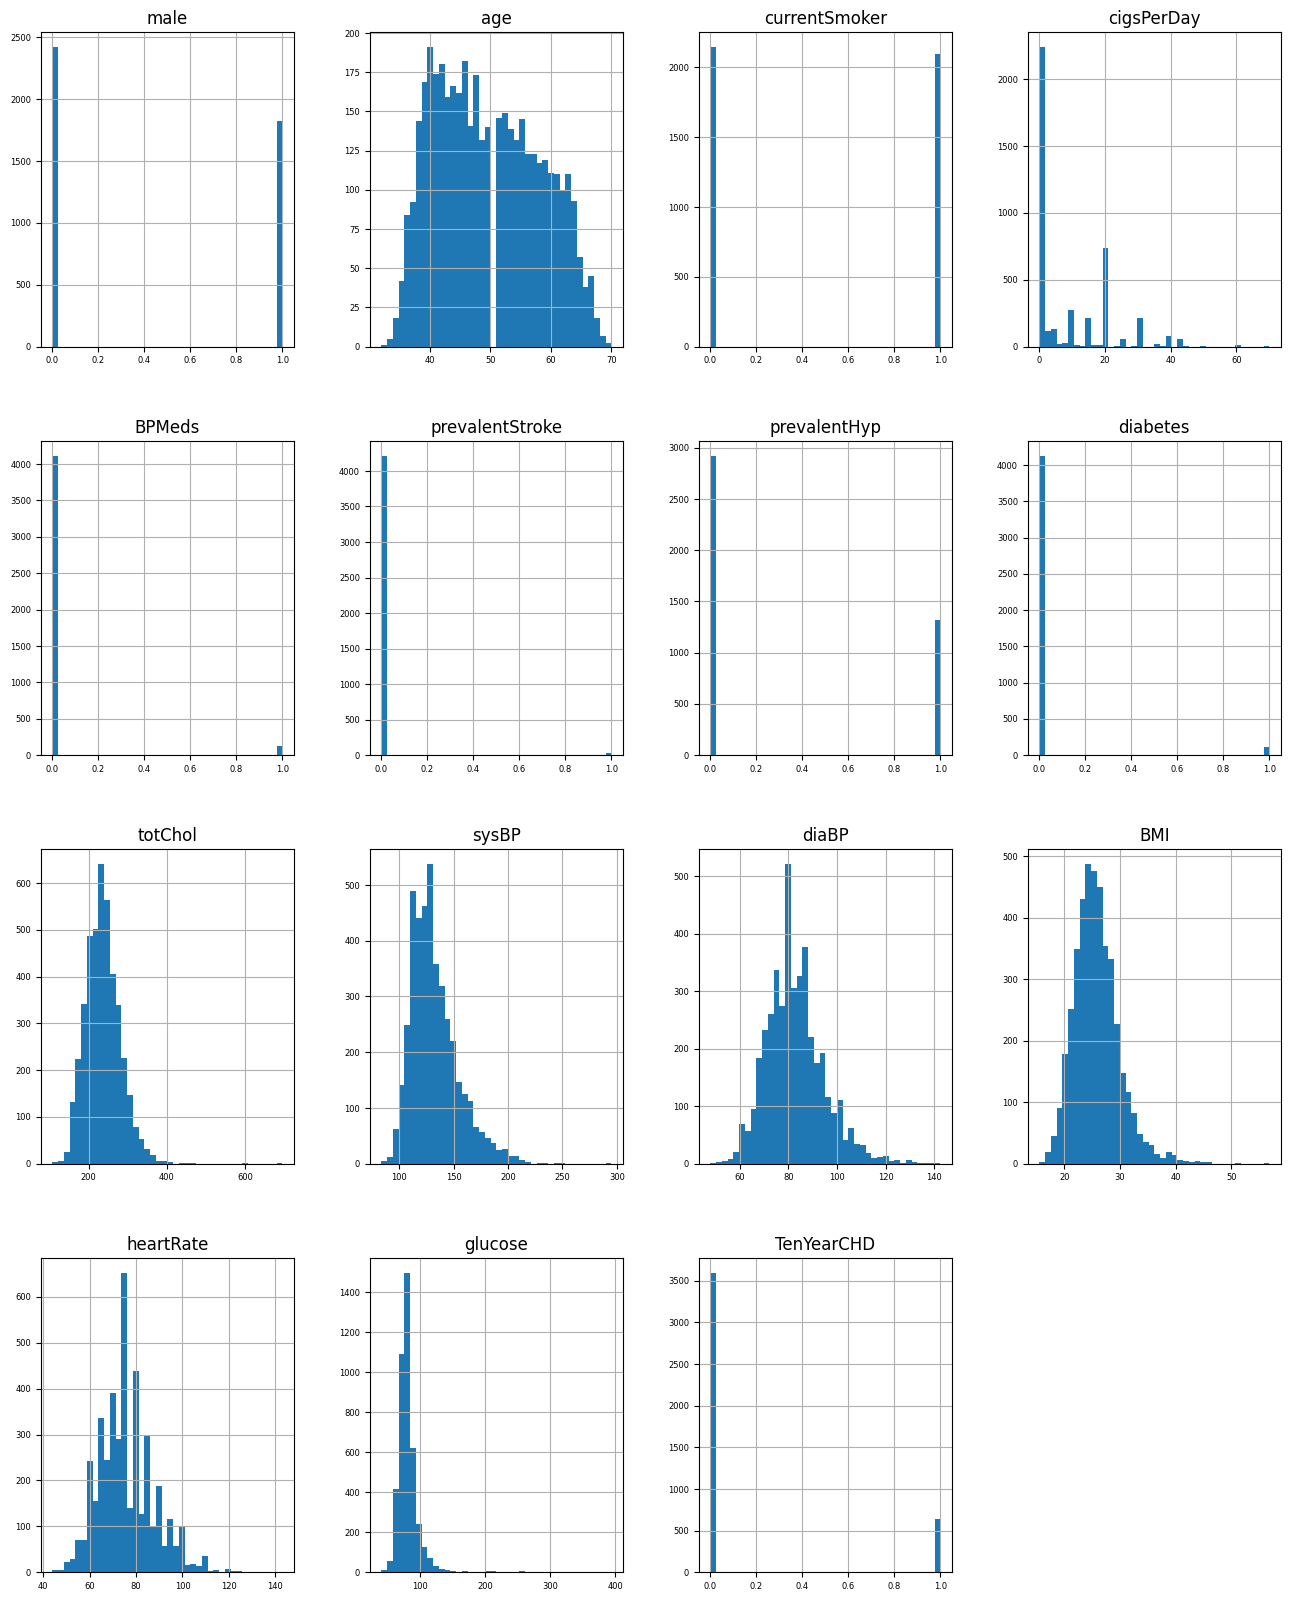

In [ ]:
#Data distribution
#Plot the distribution for all features
df.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6)

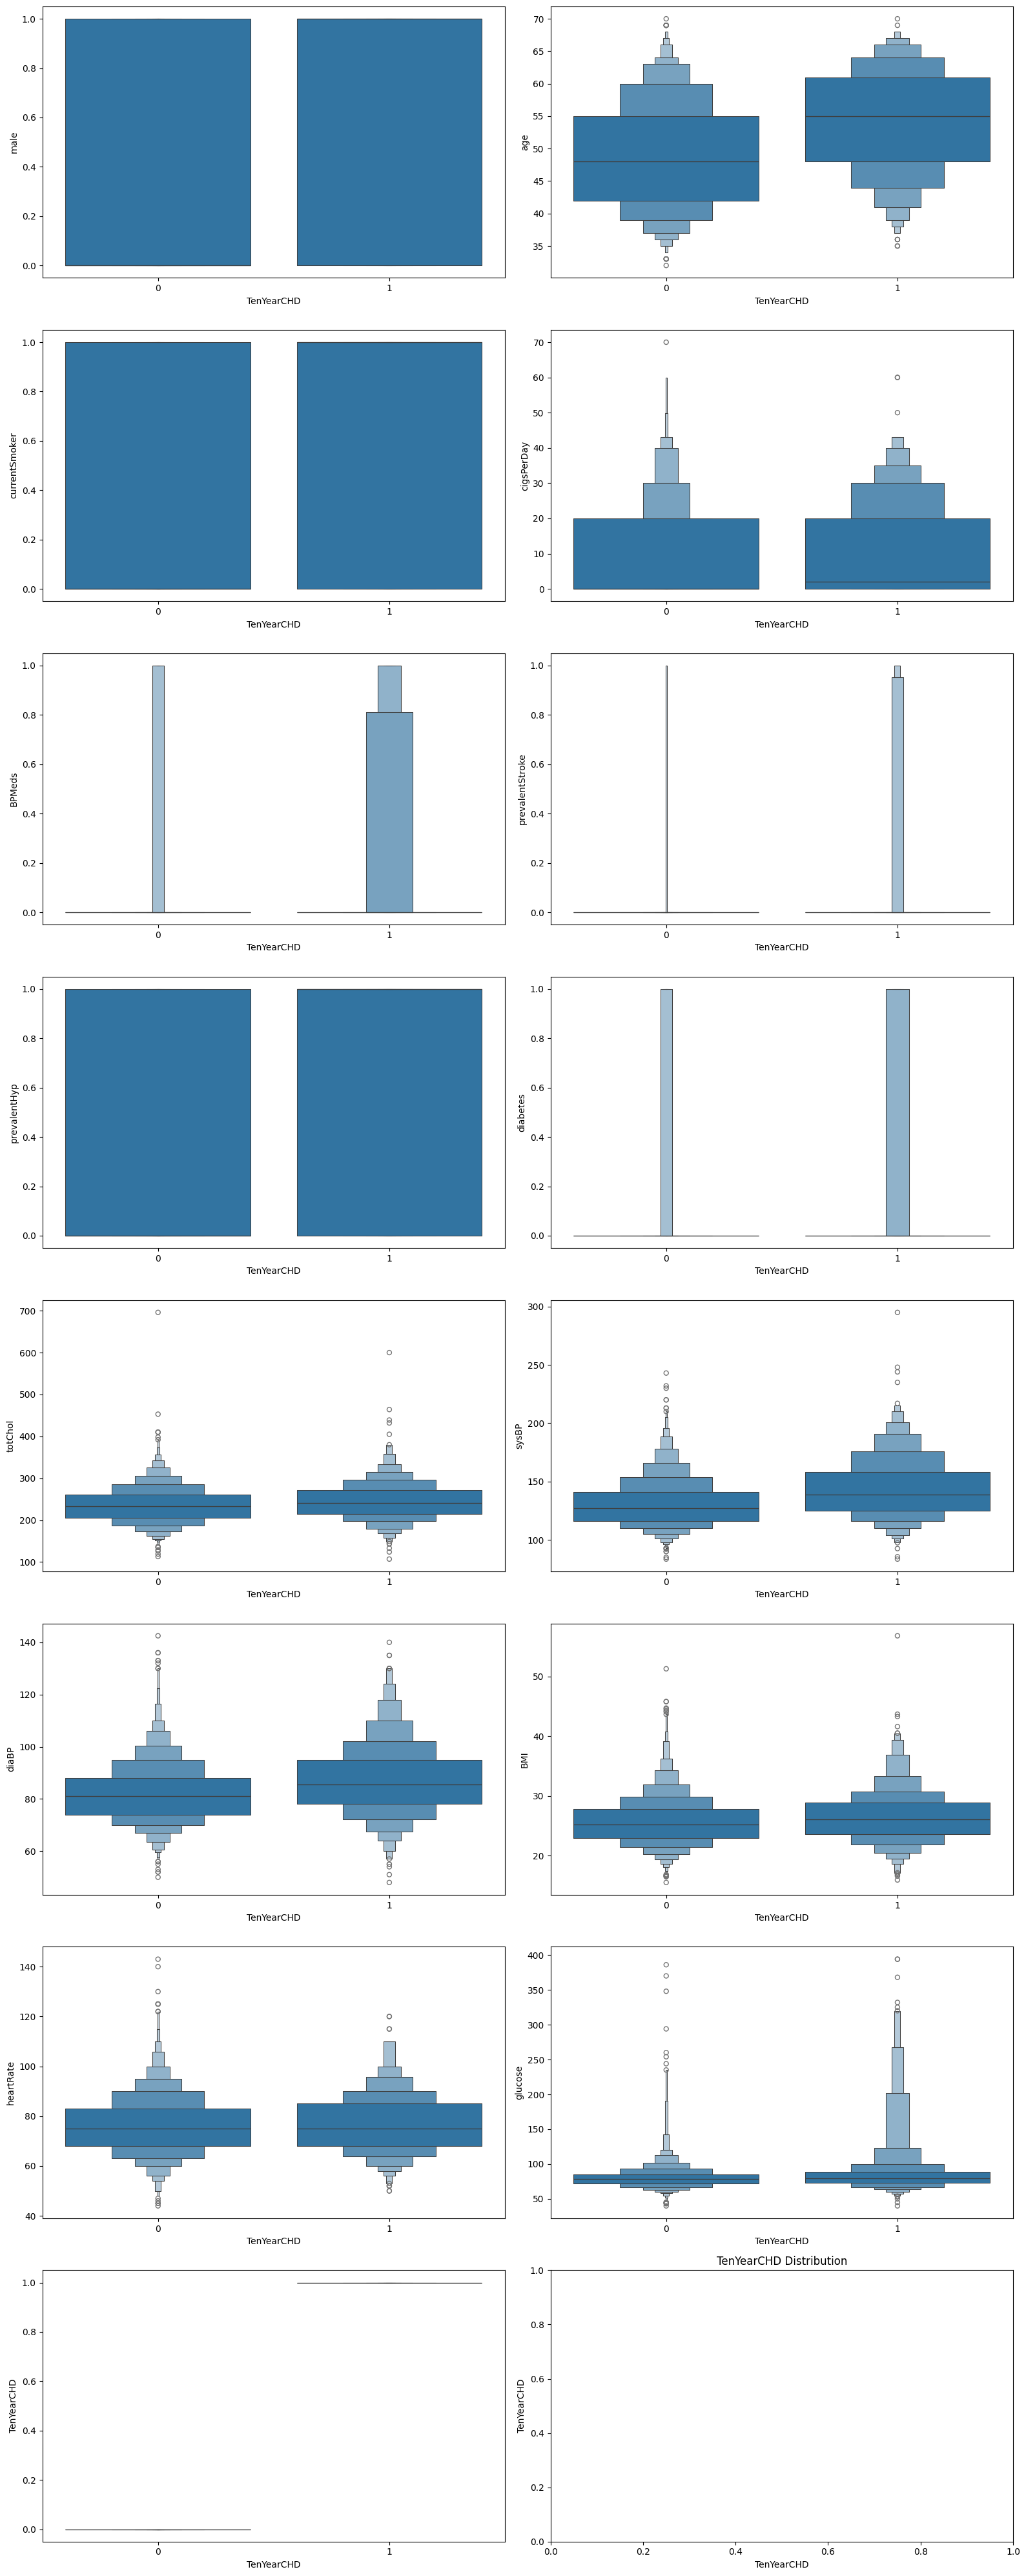

In [ ]:
fig, axes = plt.subplots(nrows=(len(df.columns) + 1) // 2, ncols=2, figsize=(16, 40))
for idx,column in enumerate(df):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.boxenplot( x='TenYearCHD' , y= column , data=df, ax=axes[row_idx, col_idx])
    plt.xlabel('TenYearCHD')
    plt.ylabel(column)
    plt.title(f"{column} Distribution")
    plt.tight_layout()


In [ ]:
#There is not a lot of outliers

<Axes: >

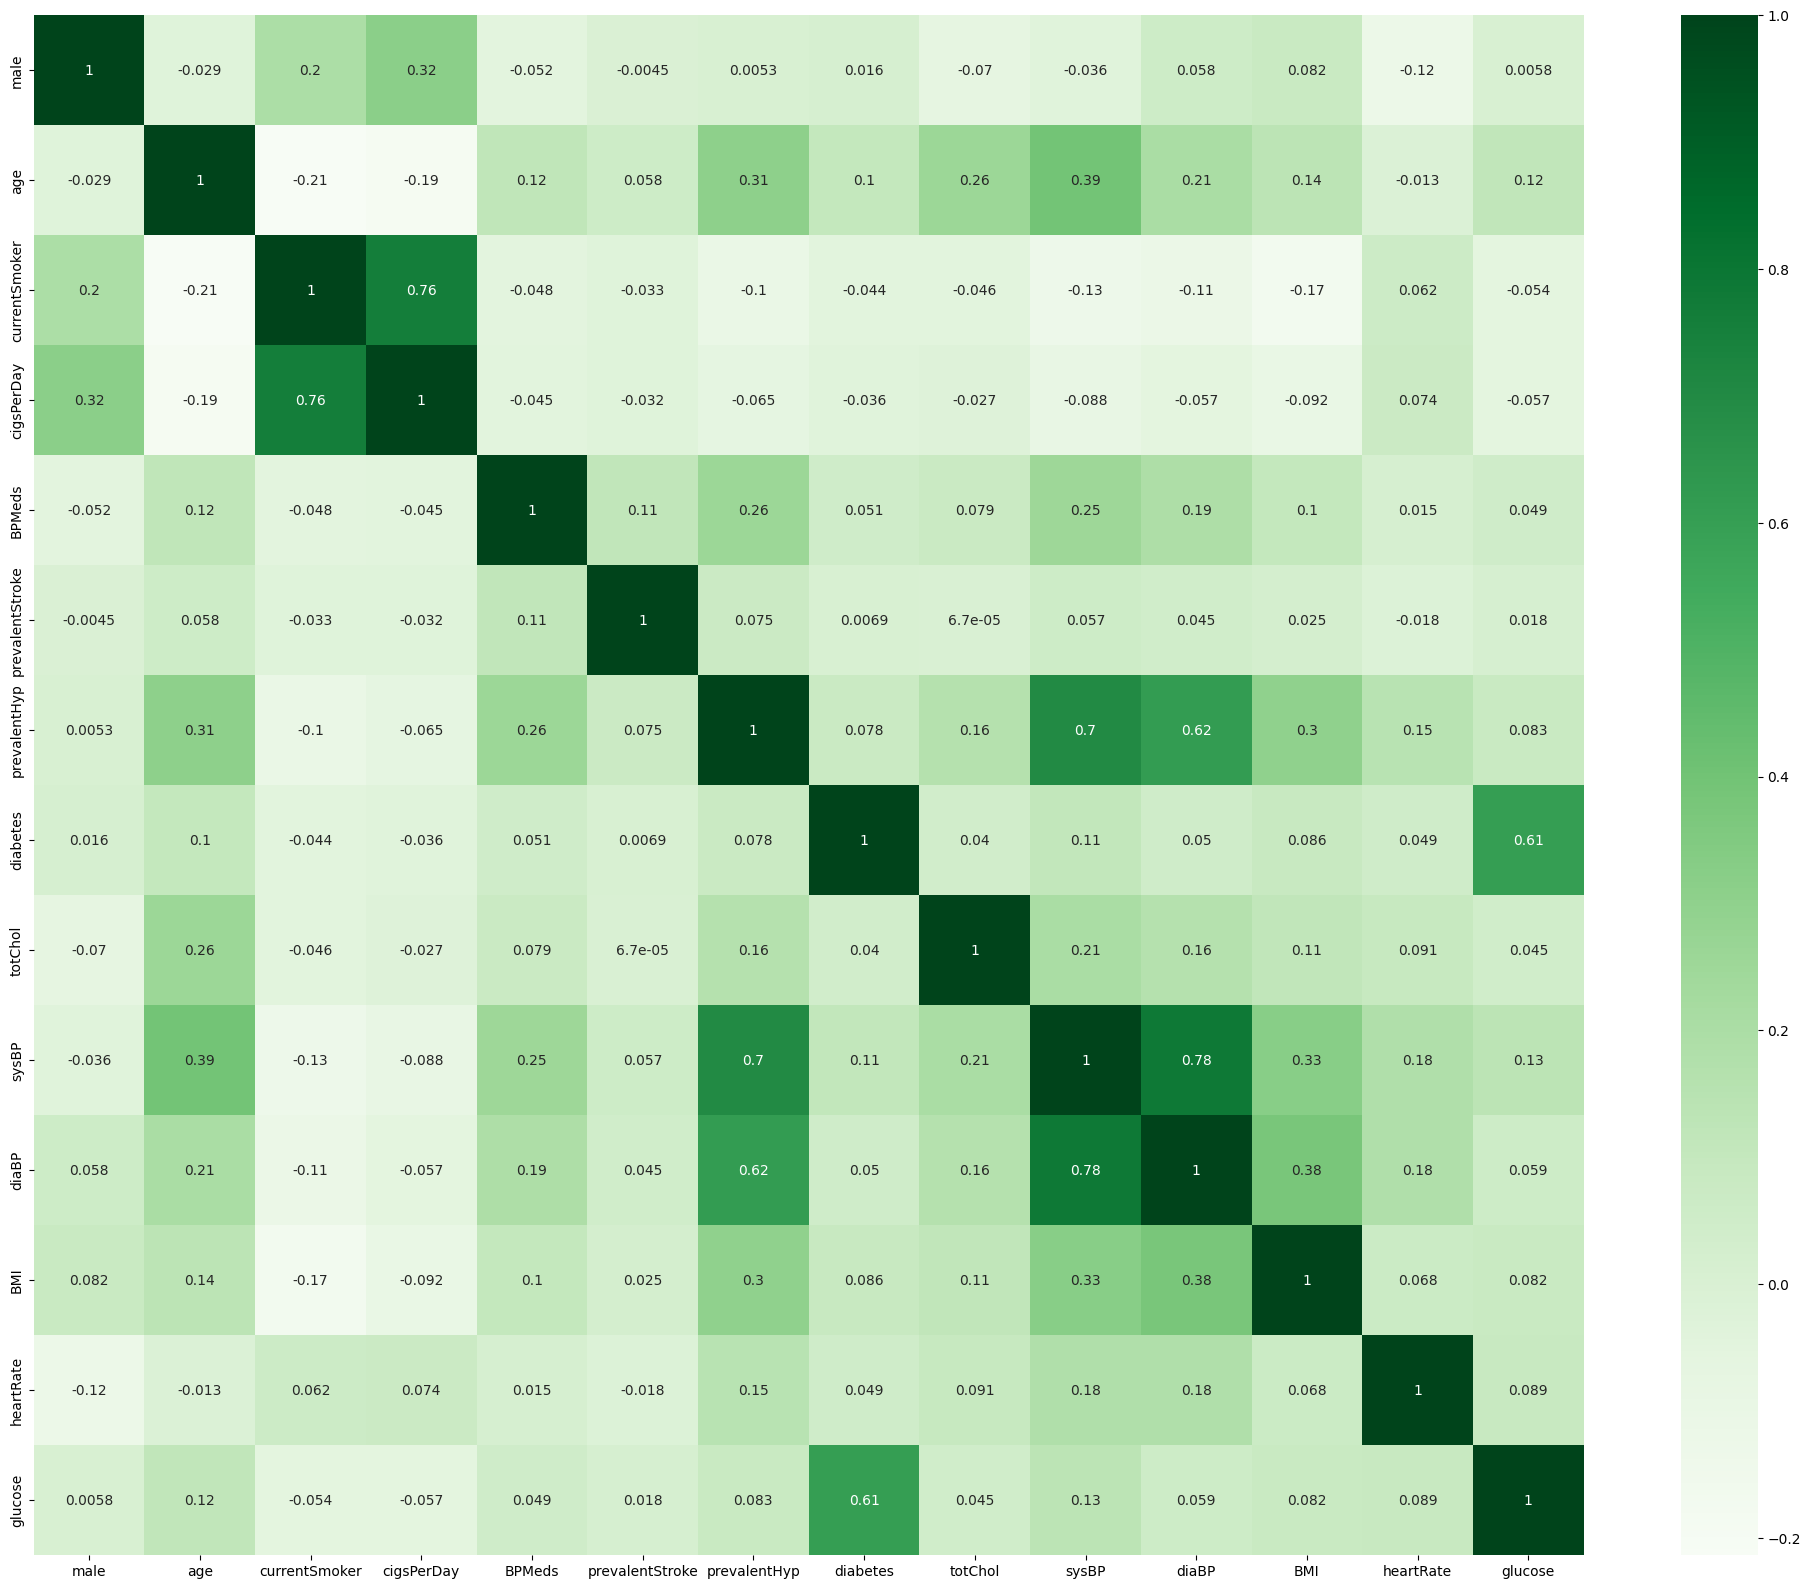

In [ ]:
#Multicollinearity
corr = df.drop(columns= 'TenYearCHD').corr()
fig , ax = plt.subplots(figsize=(25 , 20))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens')



In [ ]:
#Splitting data for train and test
df.head()
X = df.drop(columns=['TenYearCHD'])
target = df['TenYearCHD']
X_train , X_test , y_train , y_test = train_test_split(X ,target ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3390, 14)
y_train shape: (3390,)
X_test shape: (848, 14)
y_test shape: (848,)


In [ ]:
#Logistic regression model
#LR_model = make_pipeline(
#SimpleImputer(strategy='mean')
#MinMaxScaler()
#LogisticRegression()
# )
#LR_model.fit(X_train,y_train)\n",

# Applying MinMaxScaler\n",
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initializing and fitting the Logistic Regression model
LR_model = LogisticRegression()
LR_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
#get predictions for training and testing data
y_training_pred = LR_model.predict(X_train_scaled)
y_testing_pred = LR_model.predict(X_test_scaled)

#get accuracy for training and testing
training_acc = accuracy_score(y_train, y_training_pred)
testing_acc = accuracy_score(y_test, y_testing_pred)

print(f"Training accuracy : {training_acc: .4f}")
print(f"Testing accuracy : {testing_acc: .4f}")

Training accuracy :  0.8540
Testing accuracy :  0.8573


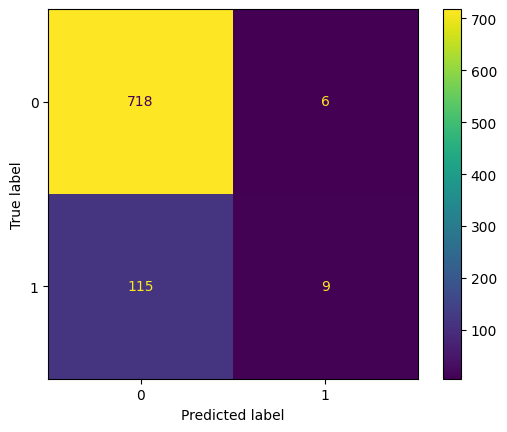

In [ ]:
#Confusion matrix
ConfusionMatrixDisplay.from_estimator(LR_model,X_test_scaled,y_test)


In [ ]:
print(classification_report(y_test , LR_model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848

